## Introdução

A ideia desse modelo é determinar se uma pessoa tem ou não cancer de pulmão. Foi utilizado o dataset [lung-cancer-detection](https://www.kaggle.com/datasets/jillanisofttech/lung-cancer-detection). No qual os dados com valor 1 correspondem a não e com o valor 2 correspondem a sim. Para gênero M é masculino e F feminino. Já para o resultado YES é pode vir a ter cancer de pulmão ou já tem e NO é não tem e não tem predisposição.

## Pre-processamento do dado

Importando a base de dados:

In [287]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle: path = Path('../input/lung-cancer-detection')
else:
    import zipfile,kaggle
    path = Path('survey lung cancer')
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)
df = pd.read_csv(path/'survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Verificando se tem algum campo nulo ou vazio:

In [76]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Renomeando algumas colunas para facilitar manuseio posterior. E transformando as colunas com valor 1 e 2 para variáveis categoricas. Também transformando o resultado em binário:

In [288]:
import pandas as pd
def proc_data(df):
    df.rename(columns={'CHRONIC DISEASE': 'CHRONIC_DISEASE'}, inplace=True)
    df.rename(columns={"ALCOHOL CONSUMING": "ALCOHOL_CONSUMING"}, inplace=True)
    df.rename(columns={"SHORTNESS OF BREATH": "SHORTNESS_OF_BREATH"}, inplace=True)
    df.rename(columns={"SWALLOWING DIFFICULTY": "SWALLOWING_DIFFICULTY"}, inplace=True)
    df.rename(columns={"CHEST PAIN": "CHEST_PAIN"}, inplace=True)
    vars = ["GENDER", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC_DISEASE", "WHEEZING", "ALCOHOL_CONSUMING", "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"]
    df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})
    for var in vars:
        df[var] = pd.Categorical(df[var])

proc_data(df)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


Lista de váriaveis continuas, categoricas e dependetes:

In [289]:
cats = ["GENDER", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC_DISEASE","WHEEZING", "ALCOHOL_CONSUMING", "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"]
conts = ["AGE"]
dep = "LUNG_CANCER"

Mostrando o valor original, por exemplo, da variável GENDER:

In [321]:
df.GENDER.head()

0    M
1    M
2    F
3    M
4    F
Name: GENDER, dtype: category
Categories (2, object): ['F', 'M']

Mostrando como ela é armazenada de fato:

In [320]:
df.GENDER.cat.codes.head()

0    1
1    1
2    0
3    1
4    0
dtype: int8

## Separações binárias

Mostrando via gráfico a separação em dois grupos, gênero e se consome ou não alcool:

[Text(0.5, 1.0, 'Count of Lung Cancer by Gender')]

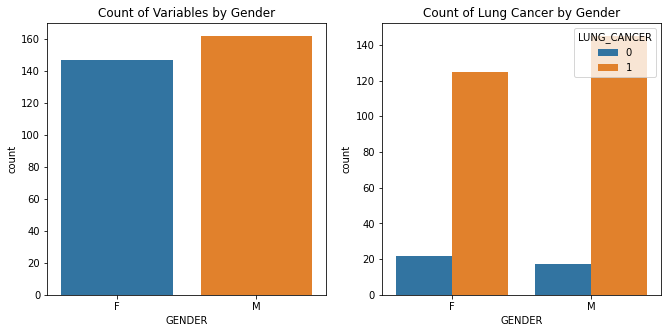

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.countplot(data=df, x='GENDER', ax=axs[0]).set(title="Count of Variables by Gender")
sns.countplot(data=df, x='GENDER', hue='LUNG_CANCER', ax=axs[1]).set(title="Count of Lung Cancer by Gender")


[Text(0.5, 1.0, 'Count of Lung Cancer by Alcohol consume')]

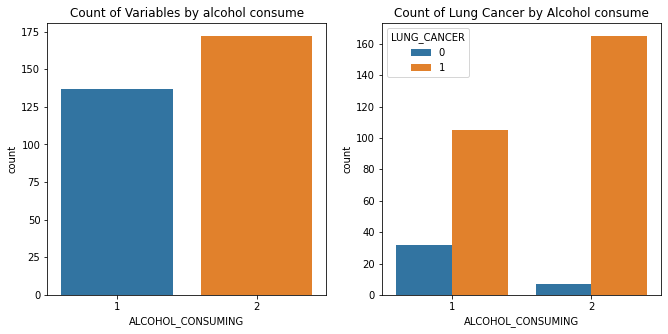

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.countplot(data=df, x='ALCOHOL_CONSUMING', ax=axs[0]).set(title="Count of Variables by alcohol consume")
sns.countplot(data=df, x='ALCOHOL_CONSUMING', hue='LUNG_CANCER', ax=axs[1]).set(title="Count of Lung Cancer by Alcohol consume")


Separando o dado entre validação e teste:

In [291]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)


Criando váriaveis independentes (x) dependentes (y):

In [292]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

No gênero, considerano a que foi transformado em categoria, temos que F é 0:

In [293]:
preds = val_xs.GENDER==0
preds

288     True
9      False
57     False
60     False
25     False
       ...  
30      True
22      True
262     True
56      True
148    False
Name: GENDER, Length: 78, dtype: bool

Usando menor erro absoluto para verificar o modelo:

In [294]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.5512820512820513

Vendo como ficaria separando uma coluna continua, no caso `AGE`.

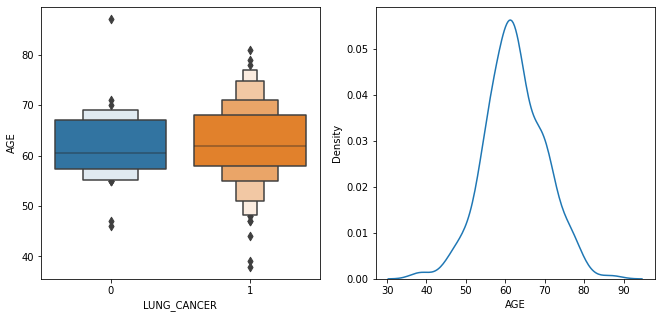

In [295]:
df_fare = trn_df[trn_df.AGE>0]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df_fare, x=dep, y="AGE", ax=axs[0])
sns.kdeplot(data=df_fare, x="AGE", ax=axs[1]);

Para a idade percebemos que os dados estão bem próximos, a média para idade em quem não tem cancêr de pulmão é 61, já de quem tem é 64.

In [323]:
preds = val_xs.AGE>62

In [324]:
mean_absolute_error(val_y, preds)

0.44871794871794873


Podemos medir a similaridade das linhas dentro de um grupo calculando o desvio padrão da variável dependente. Se esse desvio padrão for maior, significa que as linhas são mais diferentes entre si. Em seguida, multiplicaremos isso pelo número de linhas, já que um grupo maior tem mais impacto do que um grupo menor:

In [325]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

Agora que temos isso escrito, podemos calcular a pontuação para uma divisão somando os escores para o "lado esquerdo" (lhs) e "lado direito" (rhs):

In [326]:
    
def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

Impuresas para o score `GENDER`:

In [327]:
score(trn_xs["GENDER"], trn_y, 0.5)

0.3550281317000869

...e para `AGE`:

In [328]:
score(trn_xs["AGE"], trn_y, 62)

0.35505928087517225

In [317]:
def iscore(nm, split):
    col = trn_xs[nm]
    return score(col, trn_y, split)

from ipywidgets import interact
interact(nm=conts, split=15.5)(iscore);

interactive(children=(Dropdown(description='nm', options=('AGE',), value='AGE'), FloatSlider(value=15.5, descr…

In [316]:
interact(nm=cats, split=2)(iscore);

interactive(children=(Dropdown(description='nm', options=('GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'P…

Achar o melhor ponto de separação:

In [302]:
nm = "AGE"
col = trn_xs[nm]
unq = col.unique()
unq.sort()
unq

array([38, 39, 44, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 81, 87])

In [303]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

81

In [304]:
def min_col(df, nm):
    col,y = df[nm],df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

min_col(trn_df, "AGE")

(81, 0.3498036042397297)

Para todas as colunas:

In [305]:
cols = cats+conts
{o:min_col(trn_df, o) for o in cols}

{'GENDER': (0, 0.3550281317000869),
 'SMOKING': (0, 0.35355921518444905),
 'YELLOW_FINGERS': (0, 0.3398139383582157),
 'ANXIETY': (0, 0.3481431386629927),
 'PEER_PRESSURE': (0, 0.34474761278886124),
 'CHRONIC_DISEASE': (0, 0.35117464205056487),
 'WHEEZING': (0, 0.3313459366886335),
 'ALCOHOL_CONSUMING': (0, 0.32100837233075347),
 'COUGHING': (0, 0.33104999088251064),
 'SHORTNESS_OF_BREATH': (0, 0.35219692475656433),
 'SWALLOWING_DIFFICULTY': (0, 0.3229737538025527),
 'CHEST_PAIN': (0, 0.3439568598257194),
 'AGE': (81, 0.3498036042397297)}


De acordo com isso, ALCOHOL_CONSUMING=0 é a melhor divisão que podemos usar.

Acabamos de reinventar o classificador OneR (ou pelo menos, uma variante menor dele), que foi considerado um dos classificadores mais eficazes em conjuntos de dados do mundo real, em comparação com os algoritmos utilizados em 1993. Como é tão simples e surpreendentemente eficaz, serve como uma ótima referência - isto é, um ponto de partida que você pode usar para comparar seus modelos mais sofisticados.

Anteriormente, descobrimos que nossa regra do OneR teve um erro de cerca de 0.321, então manteremos isso em mente enquanto experimentamos abordagens mais sofisticadas.

## Criando àrvore de decisão

Pegando os dois grupos (alcoolicos e não alcoolicos) e criando uma separação binária para cada um, procurando a melhor separação para cada um:

In [256]:
cols.remove("ALCOHOL_CONSUMING")
isalcoholic = trn_df.ALCOHOL_CONSUMING==1
alcoholic,notalcoholic = trn_df[isalcoholic],trn_df[~isalcoholic]

Melhor separação para alcoolicos:

In [306]:
{o:min_col(alcoholic, o) for o in cols}

{'GENDER': (0, 0.18569189869071687),
 'SMOKING': (0, 0.21171164148547542),
 'YELLOW_FINGERS': (0, 0.20843710894886425),
 'ANXIETY': (0, 0.21615090374941967),
 'PEER_PRESSURE': (1, 0.21628982288819326),
 'CHRONIC_DISEASE': (1, 0.21628982288819326),
 'WHEEZING': (0, 0.21228536118574529),
 'ALCOHOL_CONSUMING': (1, 0.21628982288819326),
 'COUGHING': (0, 0.21269894519256463),
 'SHORTNESS_OF_BREATH': (0, 0.19265277978537151),
 'SWALLOWING_DIFFICULTY': (0, 0.1592248606579103),
 'CHEST_PAIN': (0, 0.19909052309432493),
 'AGE': (69, 0.18991776132381955)}

E para não alcoolicos:

In [307]:
{o:min_col(notalcoholic, o) for o in cols}

{'GENDER': (0, 0.4394440972667018),
 'SMOKING': (0, 0.438865738767928),
 'YELLOW_FINGERS': (0, 0.3767308577807007),
 'ANXIETY': (0, 0.40020163442769113),
 'PEER_PRESSURE': (0, 0.39226142245730933),
 'CHRONIC_DISEASE': (0, 0.4291047749555115),
 'WHEEZING': (0, 0.42568570577943354),
 'ALCOHOL_CONSUMING': (0, 0.44027116475144695),
 'COUGHING': (0, 0.418520026294582),
 'SHORTNESS_OF_BREATH': (0, 0.437263371188375),
 'SWALLOWING_DIFFICULTY': (0, 0.39860018713774564),
 'CHEST_PAIN': (1, 0.44027116475144695),
 'AGE': (78, 0.43235658342865796)}

Melhor separação para alcoolicos é `SWALLOWING_DIFFICULTY=0`, e para não alcoolicos`PEER_PRESSURE=0`.

Ao adicionar essas regras, criamos uma árvore de decisão, onde nosso modelo primeiro verificará se ALCOHOL_CONSUMING é feminino ou masculino e, dependendo do resultado, verificará as regras SWALLOWING_DIFFICULTY ou PEER_PRESSURE, conforme apropriado. Poderíamos então repetir o processo, criando novas regras adicionais para cada um dos quatro grupos que criamos.

Em vez de escrever esse código manualmente, podemos usar o DecisionTreeClassifier, do sklearn, que faz exatamente isso para nós:

In [308]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [309]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

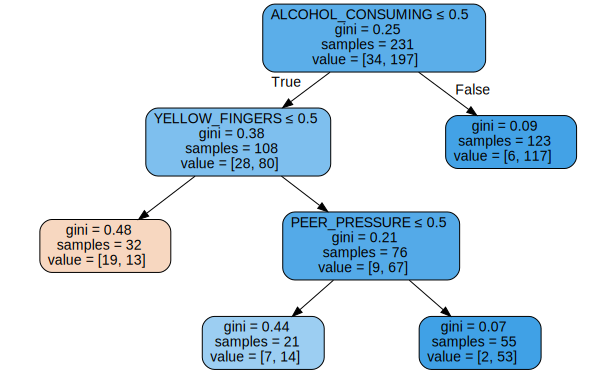

In [310]:
draw_tree(m, trn_xs, size=10)

Definição de gini (outra medida de impurezas):

In [311]:
def gini(cond):
    act = df.loc[cond, dep]
    return 1 - act.mean()**2 - (1-act).mean()**2

In [312]:
gini(df.ALCOHOL_CONSUMING==1), gini(df.ALCOHOL_CONSUMING==2)

(0.3580371889818319, 0.07808274743104372)

Comparando esse modelo com a versão do OneR:

In [313]:
mean_absolute_error(val_y, m.predict(val_xs))

0.07692307692307693

Criando uma árvore maior:

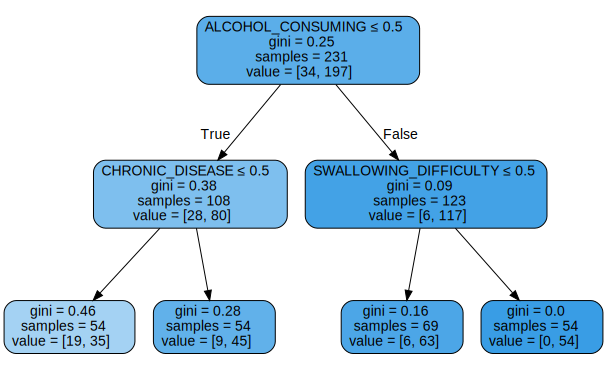

In [314]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [315]:
mean_absolute_error(val_y, m.predict(val_xs))

0.0641025641025641

## Floresta randomica

Não podemos tornar a árvore de decisão muito maior do que o exemplo acima, pois alguns nós folha já têm apenas 50 linhas. Isso não é muitos dados para fazer uma previsão.

Então, como poderíamos usar árvores maiores? Uma grande ideia veio de Leo Breiman: e se criarmos muitas árvores maiores e tirarmos a média de suas previsões? Tirar a previsão média de um conjunto de modelos dessa forma é conhecido como bagging.

A ideia é que queremos que as previsões de cada modelo no conjunto médio sejam não correlacionadas entre si. Dessa forma, se tirarmos a média das previsões, a média será igual ao verdadeiro valor alvo - isso porque a média de muitos erros aleatórios não correlacionados é zero. Isso é uma ideia bastante surpreendente!

Uma maneira de criar um conjunto de modelos não correlacionados é treinar cada um deles em um subconjunto diferente e aleatório dos dados. Aqui está como podemos criar uma árvore em um subconjunto aleatório dos dados:

In [329]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

Criando várias árvores:

In [330]:
trees = [get_tree() for t in range(100)]

Predição média dessas árvores de predições:

In [331]:
all_probs = [t.predict(val_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)

mean_absolute_error(val_y, avg_probs)

0.10243589743589744

Isso é quase idêntico ao que o RandomForestClassifier do sklearn faz. A principal peça adicional em uma floresta aleatória "real" é que, além de escolher uma amostra aleatória de dados para cada árvore, ela também seleciona um subconjunto aleatório de colunas para cada divisão. Aqui está como repetimos o processo acima com uma floresta aleatória:

In [332]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
mean_absolute_error(val_y, rf.predict(val_xs))

0.0641025641025641

Uma característica particularmente interessante das florestas aleatórias é que elas podem nos dizer quais variáveis independentes foram as mais importantes no modelo, utilizando feature_importances_:

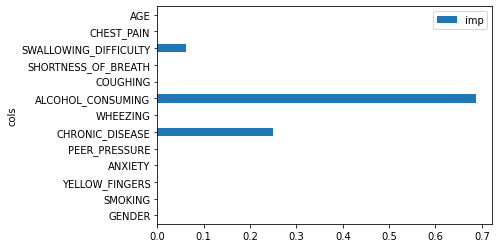

In [333]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');

Podemos ver que `ALCOHOL_CONSUMING` é de longe o preditor mais importante, seguido por `CHRONIC_DISEASE` em segundo lugar e `SWALLOWING_DIFFICULTY` em seguida.